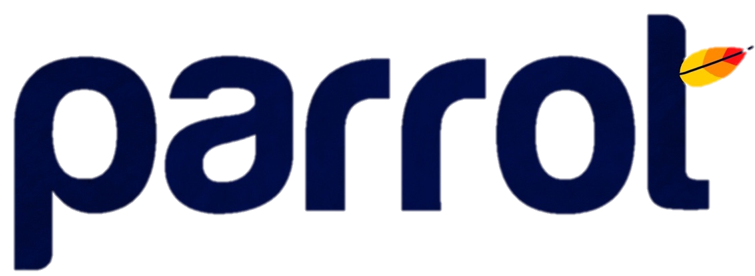

# 20211008 (MLP_Homework)

5기 Level 1 MLP Session 과제입니다.

# Contents


1. Dataset 개요
2. Competition 일정 및 규칙
3. 참고 자료 및 출처

In [ ]:
import os
import numpy as np
import pandas as pd
from pprint import pprint

import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Muffin Vs. Chihuahua

해당 문제는 아래 두 자료에 기반하여 제작되었습니다. <br>
* https://arxiv.org/ftp/arxiv/papers/1801/1801.09573.pdf
* https://github.com/ieee8023/deep-learning-datasets

## 1-1. 두 번째 링크로부터 chihuahua-muffin dataset를 다운로드 받으세요.

chihuahua-muffin folder 총 17장의 사진과 README.md 파일이 있는데, 그중 full.jpg과  README.md 파일을 제외하고 총 16장(chihuahua 8장, muffin 8장)을 사용하여 학습을 진행할 것입니다.

In [ ]:
! git clone https://github.com/ieee8023/deep-learning-datasets

Cloning into 'deep-learning-datasets'...
remote: Enumerating objects: 53, done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 53
Unpacking objects: 100% (53/53), done.


## 1-2. chihuahua-muffin folder에서 16장의 사진의 목록을 불러온 뒤, 이를 출력하세요.

In [ ]:
path = "/content/deep-learning-datasets/chihuahua-muffin/"

dataset = os.listdir(path)

dataset.remove("full.jpg")
dataset.remove("README.md")
dataset.sort()

pprint(dataset)

['chihuahua-1.jpg',
 'chihuahua-2.jpg',
 'chihuahua-3.jpg',
 'chihuahua-4.jpg',
 'chihuahua-5.jpg',
 'chihuahua-6.jpg',
 'chihuahua-7.jpg',
 'chihuahua-8.jpg',
 'muffin-1.jpeg',
 'muffin-2.jpeg',
 'muffin-3.jpeg',
 'muffin-4.jpeg',
 'muffin-5.jpeg',
 'muffin-6.jpeg',
 'muffin-7.jpeg',
 'muffin-8.jpeg']


# 1-3. 원하는 시각화 도구를 활용하여 16개의 사진을 모두 확인해보세요.

matplotlib, seaborn, PIL, openCV 등 아무거나 사용해도 좋습니다. 만약 시각화에 익숙하시다면, full.jpg와 같이 16개의 사진을 한 번에 표현해보는 것을 추천합니다. 

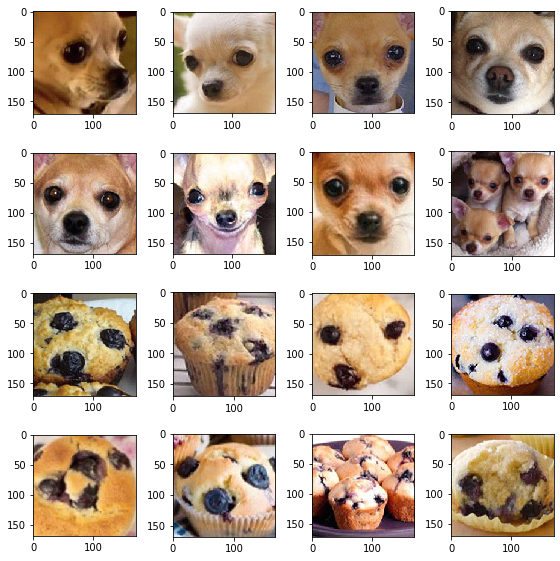

In [ ]:
fig = plt.figure(figsize=(8, 8))

for i in range(16):

    plt.subplot(4, 4, 1 + i)
    plt.tight_layout()

    image_bgr = cv2.imread(path + "{}".format(dataset[i]))
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb, cmap="rainbow", interpolation="none")
    # target = np.where(example_target[i]==1)[0]
    # plt.title("Ground Truth: {}".format(category.get(int(target))))

plt.show()

## 1-4. 16장의 사진을 다음과 같이 pandas의 DataFrame으로 정리해주세요.

``` python
index   path              category

0       "/content/ ~ "    chihuahua
1       "/content/ ~ "    chihuahua
2       "/content/ ~ "    chihuahua
3       "/content/ ~ "    chihuahua
...     ...               ...
```

함수로 작성하셔도 좋지만, 데이터의 수가 많지 않으니 직접 입력하셔도 괜찮습니다.

In [ ]:
path_list = []
category_list = []

for data in dataset:
    path_list.append(path + "{}".format(data))

    if "muffin" in data:
        category_list.append("muffin")
    
    elif "chihuahua" in data:
        category_list.append("chihuahua")
    
    else:
        category_list.append("N")

df = pd.DataFrame({"path": path_list, "category": category_list})

print(df.shape)
print(df)

(16, 2)
                                                 path   category
0   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
1   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
2   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
3   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
4   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
5   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
6   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
7   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
8   /content/deep-learning-datasets/chihuahua-muff...     muffin
9   /content/deep-learning-datasets/chihuahua-muff...     muffin
10  /content/deep-learning-datasets/chihuahua-muff...     muffin
11  /content/deep-learning-datasets/chihuahua-muff...     muffin
12  /content/deep-learning-datasets/chihuahua-muff...     muffin
13  /content/deep-learning-datasets/chihuahua-muff...     muffin
14  /content/deep

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      16 non-null     object
 1   category  16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes
None


## 1-5. muffin 중 2장, chihuahua 중 2장은 validation data로 사용할 예정입니다. 위에서 작성한 DataFrame을 train, validation으로 각각 분리해주세요. 

이와 같이 class 별로 데이터를 구성하는 것을 층화 표본 추출(Stratified sampling)이라고 합니다.

**Hint**: scikit-learn의 train_test_split()은 DataFrame 객체도 split할 수 있습니다.

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.25, stratify=df["category"])

In [ ]:
print(train_df)
print(val_df)

                                                 path   category
0   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
10  /content/deep-learning-datasets/chihuahua-muff...     muffin
14  /content/deep-learning-datasets/chihuahua-muff...     muffin
7   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
3   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
12  /content/deep-learning-datasets/chihuahua-muff...     muffin
11  /content/deep-learning-datasets/chihuahua-muff...     muffin
5   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
6   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
13  /content/deep-learning-datasets/chihuahua-muff...     muffin
1   /content/deep-learning-datasets/chihuahua-muff...  chihuahua
15  /content/deep-learning-datasets/chihuahua-muff...     muffin
                                                path   category
2  /content/deep-learning-datasets/chihuahua-muff...  chihuahua
9  /content/deep-learning-d

## 1-6. Validation Accuracy를 최대한 높이는 방향으로 학습을 진행해주세요.

아래의 generator는 위에서 작성한 DataFrame을 Keras로 연결해주는 pipeline 역할을 합니다. 지금은 이해하지 못해도 괜찮습니다. <br>
train data에 flow_train_gen를, validation data에 flow_val_gen를 넣어주면 정상적으로 학습이 진행됩니다. <br>
이미지의 크기가 모두 170 * 170으로 조정되었으니, 이 점 참고하시기 바랍니다.

In [ ]:
generator = ImageDataGenerator(rescale=1/255.0)

batch_size = 16

flow_train_gen = generator.flow_from_dataframe(dataframe=train_df, x_col="path", y_col="category", target_size = (170, 170), class_mode="binary", batch_size=batch_size, shuffle=True)
flow_val_gen = generator.flow_from_dataframe(dataframe=val_df, x_col="path", y_col="category", target_size = (170, 170), class_mode="binary", batch_size=batch_size, shuffle=False)

Found 12 validated image filenames belonging to 2 classes.
Found 4 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, \
                                    MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, \
                                       LearningRateScheduler
from tensorflow.keras.applications import VGG16, ResNet50, ResNet50V2, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical

In [ ]:
input_tensor = Input(shape=(170, 170, 3))

X = GlobalAveragePooling2D()(input_tensor)
X = Dense(256, activation="relu", name="FC_1")(X)
X = Dense(128, activation="relu", name="FC_2")(X)
X = Dense(128, activation="relu", name="FC_3")(X)
X = Dropout(rate=0.5)(X)
X = Dense(64, activation="relu", name="FC_4")(X)
X = Dropout(rate=0.2)(X)

output = Dense(1, activation="sigmoid", name="Output")(X)   # 이진분류

In [ ]:
model = Model(inputs=input_tensor, outputs=output)
model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 170, 170, 3)]     0         
_________________________________________________________________
global_average_pooling2d_6 ( (None, 3)                 0         
_________________________________________________________________
FC_1 (Dense)                 (None, 256)               1024      
_________________________________________________________________
FC_2 (Dense)                 (None, 128)               32896     
_________________________________________________________________
FC_3 (Dense)                 (None, 128)               16512     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
FC_4 (Dense)                 (None, 64)                8256

In [ ]:
history = model.fit(flow_train_gen, epochs=100, validation_data=flow_val_gen)

Epoch 1/100
1/1 [==============================] - 1s 718ms/step - loss: 0.6983 - accuracy: 0.3750 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6988 - accuracy: 0.4375 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6857 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 79ms/step - loss: 0.6911 - accuracy: 0.3750 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 71ms/step - loss: 0.6866 - accuracy: 0.5625 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6882 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 68ms/step - loss: 0.6979 - accuracy: 0.5625 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 8/100
1/1 [==

## 1-7. 학습 결과를 시각화해보세요.

Overfitting 혹은 Underfitting이 있었는지 확인해보고, 만약 있었다면 어떠한 hyperparameter를 조절해야 하는지, 혹은 Layer가 너무 많거나 적은 것은 아닌지 판단해봅시다. <br>

## 1-8. 아래 주소에서 Callback Function에 대하여 알아본 후, 이를 학습에 적용해보세요.

Callback Function은 학습 과정 중에 유동적으로 작동하여 training에 도움을 주는 아주 유용한 함수들입니다. 여러 Callback Function 중 현재 학습에 필요하다고 판단되는 함수들을 적용하여 다시 한 번 학습을 진행해봅시다.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

# 2. XOR Gate 만들기

해당 문제의 해답 코드는 밑바닥부터 시작하는 딥러닝 GitHub에서 발췌되었습니다.

https://github.com/WegraLee/deep-learning-from-scratch/tree/master/ch02

## 2-1. AND, OR, NAND Gate를 numpy만으로 구현해보세요.

NAND Gate는 AND와 반대되는 결과를 도출하는 Gate입니다.

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 2-2. 위에서 만든 세 가지의 Gate를 적절히 사용하여 XOR Gate를 구현해보세요.

XOR Gate가 1개의 layer만으로는 절대 구현될 수 없다는 것을 교육 세션에서 확인하였습니다. 두 가지 이상의 Gate를 조합해보세요.

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

# 수고하셨습니다!